<a href="https://colab.research.google.com/github/Anchaljais/AI-ML-Training/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/stock2018-2023.xlsx'):
  for filename in filenames:
    print(os.path.join(dirname,filename))

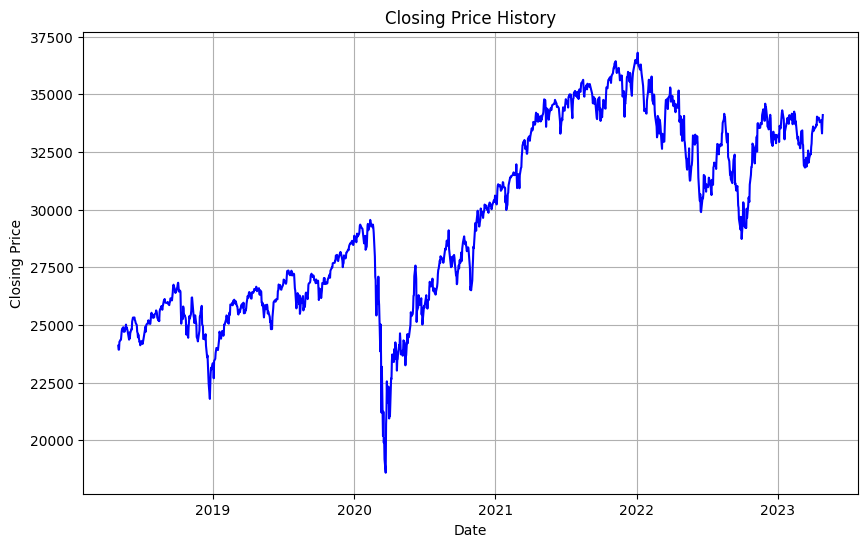

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_excel('/content/stock2018-2023.xlsx')
data.head()

import matplotlib.pyplot as plt
data['Date'] = pd.to_datetime(data['Date'])
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close*'], color = 'Blue')
plt.title('Closing Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [ ]:
null_values = data.isnull().sum()

print(null_values)

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64


In [ ]:
column_names = data.columns
column_names

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
data = pd.read_excel('/content/stock2018-2023.xlsx')
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
  # //Normalize numerical
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Adj Close**', 'Volume', 'Close*']])

In [ ]:
# ///Split data into (X)  (y) (target)
X = scaled_data[:, :-1]
y = scaled_data[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# 4. //deep learning model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# 5. //Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# 6. //Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3110
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0226
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037


In [ ]:
# 7. //Evaluate the model
loss = model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023  


In [ ]:

# 8. //Make predictions
predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [ ]:
# 9. //Calculate R-squared
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

R-squared: 0.9529069084213682


In [ ]:
# 10. //Reshape predictions to match the shape of y_test
predictions = predictions.reshape(-1, 1)

In [ ]:
# //Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.0023039149921911055
Root Mean Squared Error (RMSE): 0.047999114493822756


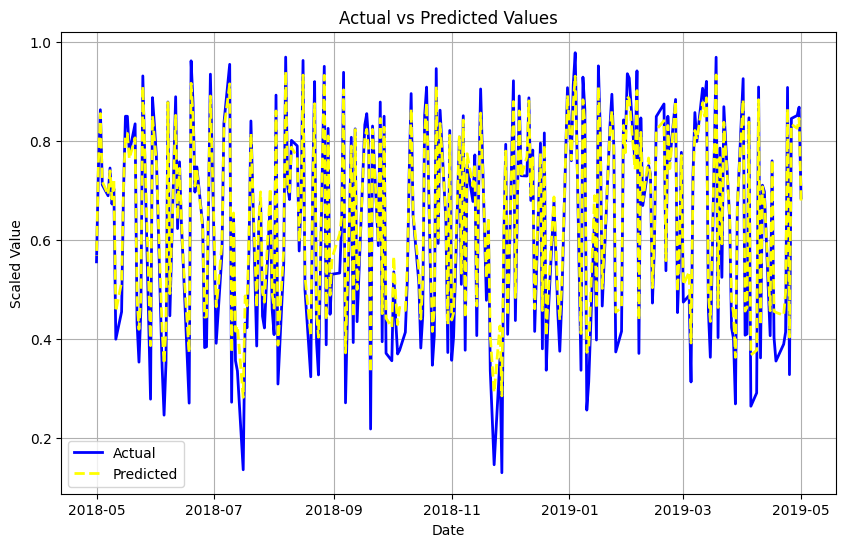

In [ ]:
# 11. //Plotting real vs predicted values with dates
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][len(X_train):], y_test, label='Actual', color='blue', linewidth=2)
plt.plot(data['Date'][len(X_train):], predictions, label='Predicted', color='yellow', linewidth=2, linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 12. //Get user input for prediction
user_input = []
features = ['Open', 'High', 'Low', 'Adj Close**', 'Volume']
for feature in features:
    value = float(input(f"Enter the value for {feature}: "))
    user_input.append(value)
user_input_scaled = scaler.transform([user_input])
user_input_reshaped = user_input_scaled.reshape(1, user_input_scaled.shape[1], 1)
prediction = model.predict(user_input_reshaped)
predicted_price = scaler.inverse_transform([[0, 0, 0, 0, 0, prediction[0][0]]])[-1][-1]
print(f"Predicted Closing Price: {predicted_price}")